# Assignment 3
### Robert Kraemer
<b>Due:</b> 10/18/2022

<b>Packages:</b> Students will write Python scripts utilizing the following packages: numpy, pandas, matplotlib, Seaborn, scikit-learn, TensorFlow 2, and others as necessary.

In [275]:
import ssl
import math
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import (OneHotEncoder, StandardScaler, 
                                   MinMaxScaler)
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     GridSearchCV, learning_curve)
from sklearn.linear_model import (LinearRegression, LogisticRegression, 
                                  SGDClassifier)
from sklearn.metrics import (mean_squared_error, classification_report, 
                             confusion_matrix, roc_auc_score, plot_roc_curve)

### Assignment 3, Part 1: 
Data Exploration. Load the titanic dataset from Seaborn by using the load_dataset(‘titanic’) method. Document the columns that are missing data both numerically (via a count) and visually (via an sns heatmap). Document which values are categorical. Explore the data and answer the following questions: Did more women or men die on the Titanic? Which passenger class was more likely to survive? What does the distribution of fare look like? What does the distribution of non-null age values look like? What is the median age of each passenger class (pclass)? Visualize this in a box plot.

In [276]:
# Load the titanic dataset from Seaborn by using the load_dataset(‘titanic’) method
ssl._create_default_https_context = ssl._create_unverified_context
titanic = sns.load_dataset('titanic')
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [277]:
# Explore the dataset
print(titanic.keys())
print(type(titanic))

# Document the columns that are missing data numerically (via a count)
titanic.isnull().sum()

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>


survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot:>

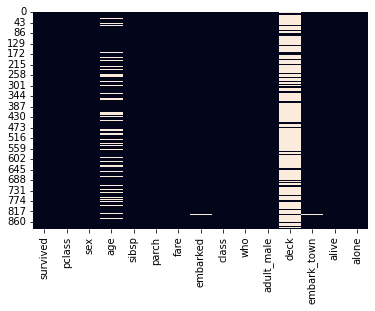

In [278]:
# Document the columns that are missing data visually (via an sns heatmap)
sns.heatmap(titanic.isnull(), cbar=False)

Document which values are categorical: 

survived, pclass, sex, sibsp, parch, embarked, class, who, adult_male, deck, embark_town, alive, alone

Explore the data and answer the following questions: 

<AxesSubplot:>

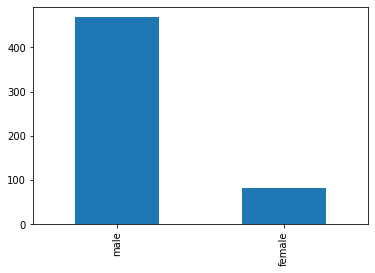

In [279]:
# Did more women or men die on the Titanic?    
titanic[titanic.survived==0].sex.value_counts().plot(kind='bar')

<AxesSubplot:>

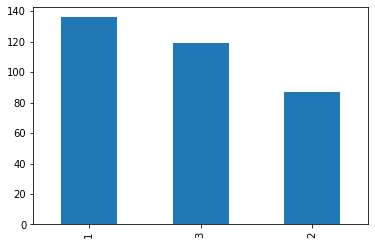

In [280]:
# Which passenger class was more likely to survive?
titanic[titanic.survived==1].pclass.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='fare', ylabel='Count'>

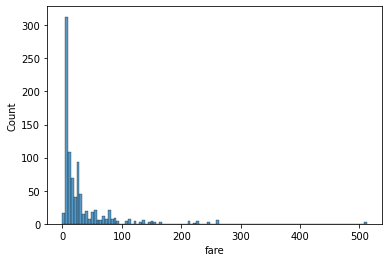

In [281]:
# What does the distribution of fare look like?
sns.histplot(titanic.fare)

<AxesSubplot:xlabel='age', ylabel='Count'>

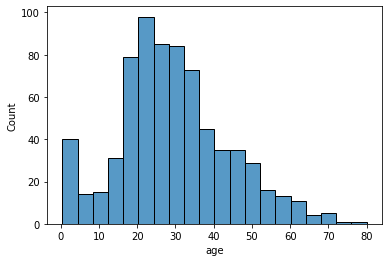

In [282]:
# What does the distribution of non-null age values look like?
sns.histplot(titanic[titanic.age.notnull()].age)

<AxesSubplot:xlabel='pclass', ylabel='age'>

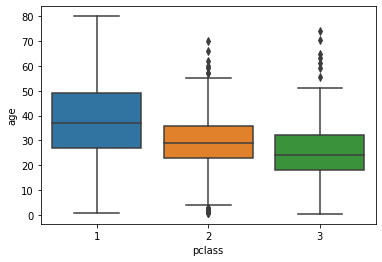

In [283]:
# What is the median age of each passenger class (pclass)? Visualize this in a box plot.
sns.boxplot(data=titanic[titanic.age.notnull()],x='pclass',y='age')

### Assignment 3, Part 2: 
Data Cleansing. Since there are so many missing values in Cabin, get rid of the cabin feature. Define a function to impute age using the median of the passenger class you computed earlier. To call it, use train[[‘age’, ‘pclass]].apply(impute_age,axis=1). Drop the remaining records containing null values. Show there are no remaining null values. Convert categorical variables to numeric dummies using pandas’ get_dummies() method. Add these to your training dataframe. Drop the categorical columns you converted earlier as well as name, ticket, and passengerId. Create a feature set by dropping “Survived.” Your resulting feature set should include pclass, age, sibsp, parch, fare, and the categorical dummy columns you created earlier. Implement a label dataframe by copying the contents of the Survived column of your training set to a new dataframe. Split your clean data into a training and test set.

In [284]:
# Get rid of the deck (cabin) feature, and redundant variables 
titanic.drop(['deck','adult_male', 'alive', 'who'],axis=1,inplace=True)

In [285]:
# Define a function to impute age using the median of the passenger class you computed earlier
def impute_age(x):
    if math.isnan(x.age) and x.pclass == 1:
        return np.median(titanic[(titanic.age.notnull()) & (titanic.pclass==1)].age)
    if math.isnan(x.age) and x.pclass == 2:
        return np.median(titanic[(titanic.age.notnull()) & (titanic.pclass==2)].age)
    if math.isnan(x.age) and x.pclass == 3:
        return np.median(titanic[(titanic.age.notnull()) & (titanic.pclass==3)].age)
    else: 
        return x.age
    
titanic['age'] = titanic[['age', 'pclass']].apply(impute_age,axis=1)

In [286]:
# Drop the remaining records containing null values
titanic.dropna(inplace=True)

In [287]:
# Show there are no remaining null values
titanic.isnull().sum()

survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
embark_town    0
alone          0
dtype: int64

In [288]:
# Convert categorical variables to numeric dummies using pandas’ get_dummies() method
col_list = ['pclass','sex', 'embarked', 'class', 'embark_town']
for col in col_list:
    titanic = pd.concat([titanic,pd.get_dummies(titanic[col],prefix=col,prefix_sep='_')], axis=1)

In [289]:
# Drop the categorical columns converted
titanic.drop(col_list, axis=1, inplace=True)

In [290]:
# Create train and test sets 
X = titanic.drop('survived', axis=1)
y = titanic[['survived']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

### Assignment 3, Part 3: 
Model Training. Implement a logistic regression model. Implement a support vector classifier. Implement an sgd classifier. Print out the classification reports, confusion matrices, and roc score and chart for each of these. Remember to set Probability=True for SVM and use method=decision_function in a cross_val_predict instead of predict_proba for the SGD ROC plot.

In [291]:
# Implement a logistic regression model 
# Print out the classification reports, confusion matrices, and roc score and chart
lrm = LogisticRegression(max_iter=500)
lrm.fit(X_train, y_train.values.ravel())
lrm_y_pred = lrm.predict(X_test)
print(classification_report(y_test,lrm_y_pred))
print(confusion_matrix(y_test,lrm_y_pred))
print(roc_auc_score(y_test,lrm_y_pred))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       167
           1       0.78      0.75      0.77       100

    accuracy                           0.83       267
   macro avg       0.82      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267

[[146  21]
 [ 25  75]]
0.812125748502994


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


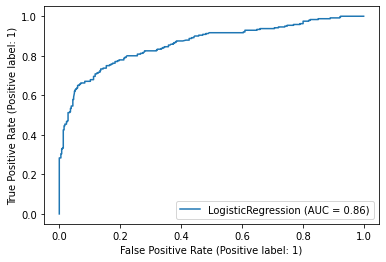

In [292]:
plot_roc_curve(lrm, X_train, y_train)
plt.show()

In [293]:
# Implement an SGD Classifier
# Print out the classification reports, confusion matrices, and roc score and chart
sgd = SGDClassifier()
sgd.fit(X_train, y_train.values.ravel())
sgd_y_pred = sgd.predict(X_test)
print(classification_report(y_test,sgd_y_pred))
print(confusion_matrix(y_test,sgd_y_pred))
print(roc_auc_score(y_test,sgd_y_pred))

              precision    recall  f1-score   support

           0       0.63      0.99      0.77       167
           1       0.50      0.01      0.02       100

    accuracy                           0.63       267
   macro avg       0.56      0.50      0.39       267
weighted avg       0.58      0.63      0.49       267

[[166   1]
 [ 99   1]]
0.502005988023952


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


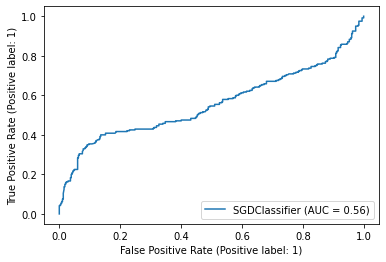

In [294]:
plot_roc_curve(sgd, X_train, y_train, response_method='decision_function')
plt.show()

In [295]:
# Implement SVC 
# Print out the classification reports, confusion matrices, and roc score and chart
svc = SVC(probability=True)
svc.fit(X_train, y_train.values.ravel())
svc_y_pred = svc.predict(X_test)
print(classification_report(y_test,svc_y_pred))
print(confusion_matrix(y_test,svc_y_pred))
print(roc_auc_score(y_test,svc_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.92      0.78       167
           1       0.65      0.26      0.37       100

    accuracy                           0.67       267
   macro avg       0.66      0.59      0.57       267
weighted avg       0.67      0.67      0.62       267

[[153  14]
 [ 74  26]]
0.5880838323353293


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


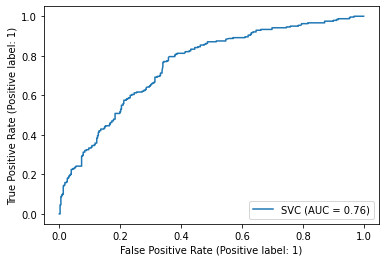

In [296]:
plot_roc_curve(svc, X_train, y_train)
plt.show()

### Assignment 3, Part 4: 
Model Tuning
- See if scaling your input data affects your SVC model (implement a sklearn pipeline to combine scaling and instantiation of your model).
- Do a grid search of your pipeline classifier using the following parameter grid: {‘\<your_svc_model_name>__kernel’: [‘rbf’], ‘\<your_svc_model_name> __gamma’: [0.0001, 0.001, 0.01, 0.1, 1], ‘\<your_svc_model_name> __C’: [1,10,50,100,200,300]}.
- Print the best estimator, its parameters, and the resulting score. Apply this estimator to your test set
- Implement a learning curve using your best estimator from the grid search. 
 - The figure should have a title of “learning curve.”
 - Label the y-axis with “Score.”
 - Label the x-axis with “Training Examples.”
 - Make the training score red.
 - Make the validation score green.
 - What does this learning curve tell you?

In [297]:
# See if scaling your input data affects your SVC model 
# (implement a sklearn pipeline to combine scaling and instantiation of your model)
pipe = Pipeline([('minmax', MinMaxScaler()), ('svc',SVC(probability=True))])

In [298]:
# Do a grid search of your pipeline classifier using the following parameter grid: 
# {‘<your_svc_model_name>__kernel’: [‘rbf’], 
#  ‘<your_svc_model_name> __gamma’: [0.0001, 0.001, 0.01, 0.1, 1], 
#  ‘<your_svc_model_name> __C’: [1,10,50,100,200,300]}
params = {'svc__kernel': ['rbf'], 
          'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1], 
          'svc__C': [1,10,50,100,200,300]}
gscv_svc = GridSearchCV(estimator=pipe, param_grid=params, scoring='roc_auc')
gscv_svc.fit(X_train, y_train.values.ravel())

GridSearchCV(estimator=Pipeline(steps=[('minmax', MinMaxScaler()),
                                       ('svc', SVC(probability=True))]),
             param_grid={'svc__C': [1, 10, 50, 100, 200, 300],
                         'svc__gamma': [0.0001, 0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             scoring='roc_auc')

In [299]:
# Print the best estimator, its parameters, and the resulting score
print(gscv_svc.best_estimator_)
print(gscv_svc.best_params_)
print(gscv_svc.best_score_)

Pipeline(steps=[('minmax', MinMaxScaler()),
                ('svc', SVC(C=200, gamma=0.01, probability=True))])
{'svc__C': 200, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}
0.8572617623604467


In [300]:
# Apply this estimator to your test set
best_svc = gscv_svc.best_estimator_
pipe = Pipeline([('minmax', MinMaxScaler()), ('svc', best_svc)])
pipe.fit(X_train, y_train.values.ravel())
pipe_y_predict = pipe.predict(X_test)
print(classification_report(y_test,pipe_y_predict))
print(confusion_matrix(y_test,pipe_y_predict))
print(roc_auc_score(y_test,pipe_y_predict))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86       167
           1       0.83      0.60      0.70       100

    accuracy                           0.81       267
   macro avg       0.81      0.76      0.78       267
weighted avg       0.81      0.81      0.80       267

[[155  12]
 [ 40  60]]
0.7640718562874252


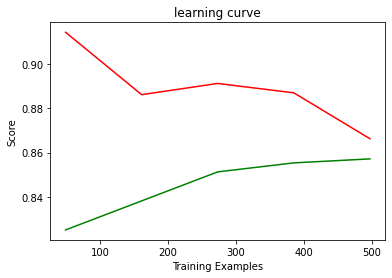

In [301]:
# Implement a learning curve using your best estimator from the grid search.
# The figure should have a title of “learning curve.”
# Label the y-axis with “Score.”
# Label the x-axis with “Training Examples.”
# Make the training score red.
# Make the validation score green.
# What does this learning curve tell you?
train_sizes, train_scores, validation_scores = learning_curve(pipe, X_train, y_train.values.ravel(), scoring='roc_auc')
plt.plot(train_sizes, train_scores.mean(1),'red')
plt.plot(train_sizes, validation_scores.mean(1),'green')
plt.title('learning curve')
plt.ylabel('Score')
plt.xlabel('Training Examples')
plt.show()

We see that as the number of training examples increase, the training and testing scores for the best svc model begin to converge. 